In [1]:
import random

import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import utils,losses
from tensorflow.keras.datasets import mnist,fashion_mnist,cifar100,cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, Lambda, Conv2D,MaxPooling2D
from tensorflow.keras.optimizers import RMSprop,Adadelta
from tensorflow.keras import backend as K

import matplotlib.pyplot as plt
import cv2

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

In [4]:
num_classes=10

In [17]:
def create_base_network(input_shape):
    '''Base network to be shared (eq. to feature extraction).
    '''
    input = Input(shape=input_shape)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(input)
    #x = Dropout(0.1)(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.5)(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    #x = Dropout(0.1)(x)
    x = Dense(128, activation='relu')(x)
    #x = Dropout(0.1)(x)
    x = Dense(128, activation='relu')(x)
    #for 2D view
    x = Dense(  num_classes,activation="softmax")(x)
    return Model(input, x)

In [18]:
my_cnn=create_base_network((28,28,1))
my_cnn.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0   

In [8]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
#(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

y_train = y_train.astype("float32")
y_test  = y_test.astype("float32")
x_train /= 255
x_test /= 255
input_shape = (x_train.shape[1],x_train.shape[1],1)
#input_shape = x_train.shape[1:]
# convert class vectors to binary class matrices
y_train = utils.to_categorical(y_train, num_classes)
y_test  = utils.to_categorical(y_test, num_classes)
print(input_shape)

(28, 28, 1)


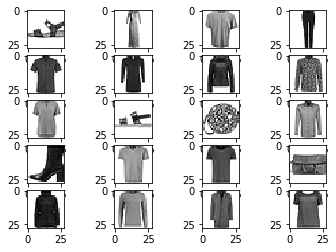

In [9]:
for i in range(20):
    plt.subplot(5,4,i+1)
    idx=random.randrange(0,x_train.shape[0])
    plt.imshow(x_train[idx,:,:,0], cmap="gray_r")
plt.show()

In [19]:
my_cnn.compile(loss=losses.categorical_crossentropy,
              optimizer=Adadelta(),
              metrics=['accuracy'])

In [22]:
epochs=10
batch_size=1000
my_cnn.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 91us/sample - loss: 2.2934 - accuracy: 0.1607 - val_loss: 2.2953 - val_accuracy: 0.2755
Epoch 2/10
60000/60000 [==============================] - 5s 91us/sample - loss: 2.2918 - accuracy: 0.1754 - val_loss: 2.2943 - val_accuracy: 0.2926
Epoch 3/10
60000/60000 [==============================] - 5s 91us/sample - loss: 2.2901 - accuracy: 0.1898 - val_loss: 2.2932 - val_accuracy: 0.3085
Epoch 4/10
60000/60000 [==============================] - 5s 92us/sample - loss: 2.2884 - accuracy: 0.2052 - val_loss: 2.2921 - val_accuracy: 0.3200
Epoch 5/10
60000/60000 [==============================] - 5s 91us/sample - loss: 2.2865 - accuracy: 0.2185 - val_loss: 2.2909 - val_accuracy: 0.3275
Epoch 6/10
60000/60000 [==============================] - 5s 91us/sample - loss: 2.2846 - accuracy: 0.2336 - val_loss: 2.2897 - val_accuracy: 0.3330
Epoch 7/10
60000/60000 [==============================] 